In [ ]:
import numpy as np

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        y = y.ravel()
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.max_iterations):
            # Forward pass
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
# Example usage
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    
    # Create and train model
    model = LinearRegression(learning_rate=0.01, max_iterations=1000)
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Print results
    print(f"Weights: {model.weights}")
    print(f"Bias: {model.bias}")


    for i in range (len(y)):
        print(f"y = {y[i]}, y_pred = {y_pred[i]}")

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.mse_history = []
        self.weights_history = []
        self.bias_history = []
        
    def compute_mse(self, X, y):
        y_pred = np.dot(X, self.weights) + self.bias
        return np.mean((y_pred - y) ** 2)
        
    def fit(self, X, y):
        y = y.ravel()
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.max_iterations):
            # Forward pass
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute and store MSE
            mse = self.compute_mse(X, y)
            self.mse_history.append(mse)
            self.weights_history.append(self.weights.copy())
            self.bias_history.append(self.bias)
            
            # Compute gradients
            error = y_predicted - y
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def plot_training_progress(self, X, y):
        # Plot 1: MSE over iterations
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.plot(self.mse_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE over Iterations')
        
        # Plot 2: Weights and Bias over iterations
        plt.subplot(1, 3, 2)
        plt.plot(self.weights_history, label='Weight')
        plt.plot(self.bias_history, label='Bias')
        plt.xlabel('Iteration')
        plt.ylabel('Parameter Value')
        plt.title('Weights and Bias Updates')
        plt.legend()
        
        # Plot 3: Data and fitted line
        plt.subplot(1, 3, 3)
        plt.scatter(X, y, color='blue', label='Data')
        X_line = np.array([X.min(), X.max()])
        y_line = self.predict(X_line.reshape(-1, 1))
        plt.plot(X_line, y_line, color='red', label='Fitted Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Data and Fitted Line')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = (4 + 3 * X + np.random.randn(100, 1)).ravel()
    
    # Create and train model
    model = LinearRegression(learning_rate=0.01, max_iterations=1000)
    model.fit(X, y)
    
    # Print final results
    print(f"Final Weights: {model.weights}")
    print(f"Final Bias: {model.bias}")
    
    # Visualize training progress
    model.plot_training_progress(X, y)

No Regularization - Final Weights: [3.12593652], Final Bias: 4.0446871544206235
L2 Regularization - Final Weights: [2.97444164], Final Bias: 4.1827922030719975


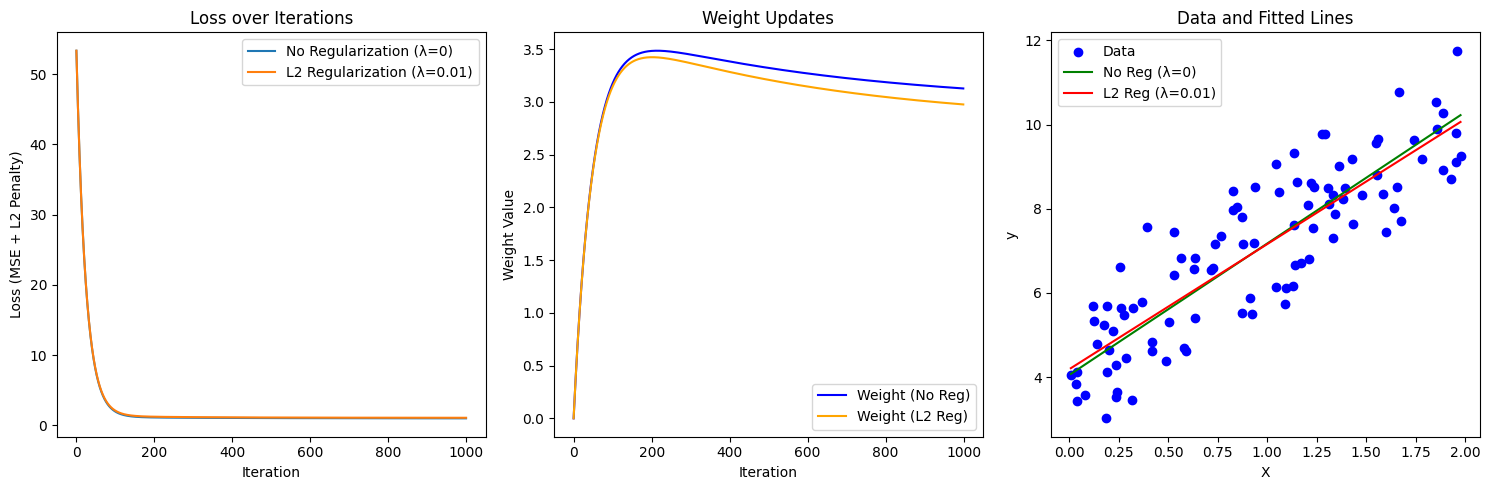

y = 6.127731182780592, y_pred = 7.475799501168498
y = 9.191962685188704, y_pred = 8.515960269355034
y = 8.082242696160323, y_pred = 7.81308725209883
y = 5.733055411704157, y_pred = 7.451227633722506
y = 8.030180989829027, y_pred = 6.693323170788034
y = 9.771253854430519, y_pred = 8.082735143721262
y = 7.804302838735806, y_pred = 6.78042684121451
y = 9.170713168880127, y_pred = 9.61993873183986
y = 8.711223941495632, y_pred = 10.069384382158788
y = 7.355100839885803, y_pred = 6.4419148466770855
y = 8.347173281522808, y_pred = 8.994451571577873
y = 8.395814588899855, y_pred = 7.351271041862146
y = 7.616542344640455, y_pred = 7.596029628913495
y = 10.530218866239679, y_pred = 9.831399819156413
y = 4.782582746361724, y_pred = 4.4887955712196135
y = 5.229348966401192, y_pred = 4.5894084738308685
y = 4.131810405362774, y_pred = 4.171090008199789
y = 10.781589567193462, y_pred = 9.250120715663943
y = 8.795852598402723, y_pred = 8.909624363113657
y = 9.622062252925616, y_pred = 9.4838926446441

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000, l2_lambda=0.0):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.mse_history = []
        self.weights_history = []
        self.bias_history = []
        
    def compute_mse(self, X, y):
        y_pred = np.dot(X, self.weights) + self.bias
        mse = np.mean((y_pred - y) ** 2)
        l2_penalty = self.l2_lambda * np.sum(self.weights ** 2)
        return mse + l2_penalty
        
    def fit(self, X, y):
        y = y.ravel()
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.max_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            mse = self.compute_mse(X, y)
            self.mse_history.append(mse)
            self.weights_history.append(self.weights.copy())
            self.bias_history.append(self.bias)
            
            error = y_predicted - y
            dw = (1/n_samples) * np.dot(X.T, error) + 2 * self.l2_lambda * self.weights
            db = (1/n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def plot_regularization_comparison(X, y, model_no_reg, model_with_reg):
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Loss over iterations
    plt.subplot(1, 3, 1)
    plt.plot(model_no_reg.mse_history, label='No Regularization (λ=0)')
    plt.plot(model_with_reg.mse_history, label='L2 Regularization (λ=0.01)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE + L2 Penalty)')
    plt.title('Loss over Iterations')
    plt.legend()
    
    # Plot 2: Weight updates
    plt.subplot(1, 3, 2)
    plt.plot(model_no_reg.weights_history, label='Weight (No Reg)', color='blue')
    plt.plot(model_with_reg.weights_history, label='Weight (L2 Reg)', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Weight Value')
    plt.title('Weight Updates')
    plt.legend()
    
    # Plot 3: Data and fitted lines
    plt.subplot(1, 3, 3)
    plt.scatter(X, y, color='blue', label='Data')
    X_line = np.array([X.min(), X.max()])
    y_pred_no_reg = model_no_reg.predict(X_line.reshape(-1, 1))
    y_pred_with_reg = model_with_reg.predict(X_line.reshape(-1, 1))
    plt.plot(X_line, y_pred_no_reg, color='green', label='No Reg (λ=0)')
    plt.plot(X_line, y_pred_with_reg, color='red', label='L2 Reg (λ=0.01)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data and Fitted Lines')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = (4 + 3 * X + np.random.randn(100, 1)).ravel()
    
    # Train model without regularization
    model_no_reg = LinearRegression(learning_rate=0.01, max_iterations=1000, l2_lambda=0.0)
    model_no_reg.fit(X, y)
    
    # Train model with L2 regularization
    model_with_reg = LinearRegression(learning_rate=0.01, max_iterations=1000, l2_lambda=0.01)
    model_with_reg.fit(X, y)
    
    # Print final results
    print(f"No Regularization - Final Weights: {model_no_reg.weights}, Final Bias: {model_no_reg.bias}")
    print(f"L2 Regularization - Final Weights: {model_with_reg.weights}, Final Bias: {model_with_reg.bias}")
    
    # Visualize comparison
    plot_regularization_comparison(X, y, model_no_reg, model_with_reg)

    for i in range (len(y)):
        print(f"y = {y[i]}, y_pred = {y_pred[i]}")